<a href="https://colab.research.google.com/github/yogialvin969/machine/blob/main/Praktikum3_G_231_21_0002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imprting modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

from google.colab import files
uploaded = files.upload()


Saving Real-estate1.csv to Real-estate1.csv


In [2]:
# importing data
df = pd.read_csv('Real-estate1.csv')
df.drop('No', inplace = True,axis=1)

print(df.head())
print(df.columns)

   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  


<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

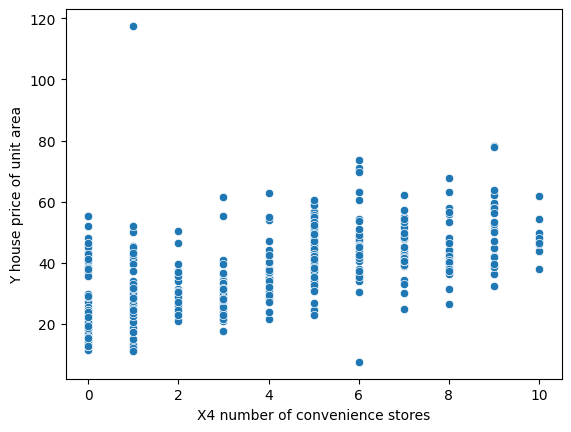

In [3]:
# plotting a scatterplot
sns.scatterplot(x='X4 number of convenience stores',
                y='Y house price of unit area', data=df)


In [4]:
# creating feature variables
x = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']
print(x)
print(y)

     X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
409             2013.000          13.7   
410             2012.667           5.6   
411             2013.250          18.8   
412             2013.000           8.1   
413             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..             

In [5]:
# creating train and test sets
x_train, x_test, y_train, y_test = train_test_split(
      x, y, test_size=0.3,random_state=101)


In [6]:
# creating a regression model
model = LinearRegression()


In [7]:
# fitting the model
model.fit(x_train,y_train)

LinearRegression()

In [8]:
# making predictions
predictions = model.predict(x_test)

In [9]:
# model evalution
print(
    'mean_squared_error : ',mean_squared_error(y_test, predictions))
print(
    'mean_eabsolute_error : ',mean_absolute_error(y_test, predictions))


mean_squared_error :  46.21179783492909
mean_eabsolute_error :  5.392293684756193


In [10]:
#	import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#	load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [12]:
#	split the data into training and testing sets
X_train, X_test,\
y_train, y_test = train_test_split(X, y,
                                  test_size=0.2,
                                  random_state=42)

In [13]:
#	create a Multinomial logistic regression model
multi_logreg = LogisticRegression(multi_class='multinomial',
                                  solver='lbfgs')
multi_logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [14]:
#	create a One-vs-Rest logistic regression model
ovr_logreg = LogisticRegression(multi_class='ovr',
                                solver='liblinear')
ovr_logreg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [15]:
#make predictions using the trained models
y_pred_multi = multi_logreg.predict(X_test)
y_pred_ovr = ovr_logreg.predict(X_test)

In [16]:
# evaluate the performance of the models
# using accuracy score and confusion matrix
print('Multinomial logistic regression accuracy:',
      accuracy_score (y_test, y_pred_multi))
print('One-vs-Rest logistic regression accuracy:',
      accuracy_score (y_test, y_pred_ovr))

conf_mat_multi = confusion_matrix(y_test, y_pred_multi)
conf_mat_ovr = confusion_matrix(y_test, y_pred_ovr)


Multinomial logistic regression accuracy: 1.0
One-vs-Rest logistic regression accuracy: 1.0


<ipython-input-17-297d80b08262>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels (iris.target_names)


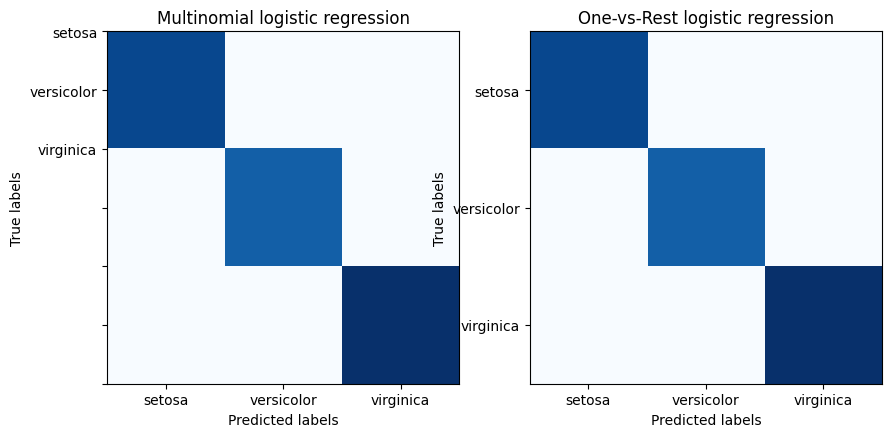

In [17]:
# plot the confusion matrices
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
axs[0].imshow(conf_mat_multi, cmap=plt.cm.Blues)
axs[0].set_title('Multinomial logistic regression')
axs[0].set_xlabel('Predicted labels')
axs[0].set_ylabel('True labels')
axs[0].set_xticks(np.arange(len(iris.target_names)))
axs[0].set_xticklabels (iris.target_names)
axs[0].set_yticklabels (iris.target_names)
axs[1].imshow(conf_mat_ovr, cmap=plt.cm.Blues)
axs[1].set_title('One-vs-Rest logistic regression')
axs[1].set_xlabel('Predicted labels')
axs[1].set_ylabel('True labels')
axs[1].set_xticks(np.arange(len(iris.target_names)))
axs[1].set_xticklabels (iris.target_names)
axs[1].set_yticks(np.arange(len(iris.target_names)))
axs[1].set_yticklabels (iris.target_names)
plt.show()

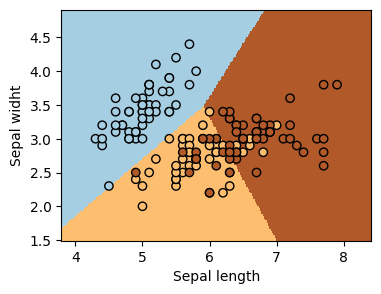

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load the iris dataset
iris = load_iris()

# Extract the features and target
X = iris.data[:, :2]
y = iris.target

# Create an instance of Logistic Regression classifier
clf = LogisticRegression(random_state=0,
                       multi_class='multinomial',
                       solver='newton-cg')
# Fit the model
clf.fit(X, y)

# Plot the decision boundaries
x_min, x_max = X[:, 0].min() -.5, X[:, 0].max() +.5
y_min, y_max = X[:, 1].min() -.5, X[:, 1].max() +.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                    np.arange(y_min, y_max, .02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k',
            cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal widht')
plt.show()

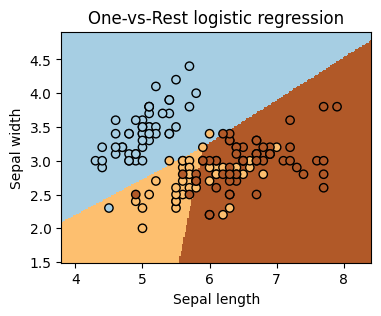

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()

# we only take the first two features for visualization
X = iris.data[:, :2]
y = iris.target

clf = LogisticRegression(random_state=0,
                         multi_class='ovr',
                         solver='liblinear')
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k',
             cmap=plt.cm. Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('One-vs-Rest logistic regression')
plt.show()